In [1]:
#Importación de paquetes
#Importamos pandas
import pandas as pd 
#Importamos numpy
import numpy as np 
#Importamos datetime 
import datetime as dt 

#Importación de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Importamos el archivo de soporte que contiene las funciones
import sys
sys.path.append('../')
from src.soporte import *

print ("Librerias importadas")

Librerias importadas


In [2]:
#Importamos el dataset ya limpio
df_eda = pd.read_csv("../clean_data/data_limpio.csv")
df_eda.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'duration', 'campaign', 'prev_contact', 'prev_calls', 'prev_result',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'suscribed', 'id', 'Income', 'Kidhome', 'Teenhome',
       'cust_date', 'NumWebVisitsMonth', 'new_int_date'],
      dtype='str')

In [3]:
#Hacemos una copia del df
df_work = df_eda
print ("DF copiado")

DF copiado


***OBJETIVO DEL EDA***

El objetivo que persigue este EDA es obtener el perfil del cliente y su relación con la columna suscripción. Para ello vamos a aislar las columnas que nos sirven del dataframe general y a transformarlas de acuerdo a nuestras necesidades:

**Paso 1: Preparación del subset de datos**

Para realizar este análisis vamos a aislar en un dataframe las columnas que nos hacen falta para este estudio que son las siguientes:
- suscribed
- age 
- job
- education
- marital
- Income
- Kidhome 
- Teenhome

In [4]:
df_eda1 = df_eda[['suscribed', 'age', 'job', 'education', 'marital', 'Income', 'Kidhome', 'Teenhome']]
print ("Dataframe creado")

Dataframe creado


***Exploración inicial de datos***

In [5]:
#Realizamos un análisis inicial de los datos
eda_inicial(df_eda1)

Variables numéricas: 
 Index(['age', 'Income', 'Kidhome', 'Teenhome'], dtype='str')
 
            count        mean         std     min      25%      50%       75%  \
age       37880.0     39.9771     10.4380    17.0     32.0     38.0      47.0   
Income    43000.0  93241.2001  50498.3162  5841.0  49610.0  93050.5  136744.5   
Kidhome   43000.0      1.0048      0.8159     0.0      0.0      1.0       2.0   
Teenhome  43000.0      0.9986      0.8160     0.0      0.0      1.0       2.0   

               max  
age           98.0  
Income    180802.0  
Kidhome        2.0  
Teenhome       2.0  
 
Variables categóricas: 
 Index(['suscribed', 'job', 'education', 'marital'], dtype='str')
 
           count unique                top   freq
suscribed  43000      2                 no  38156
job        42655     11             admin.  10873
education  41193      7  university.degree  12722
marital    42915      3            MARRIED  25999


In [6]:
#A continuación, vamos a verificar que no haya nulos de nuevo en las columnas: 
df_eda1.isnull().mean().round(4)*100

suscribed     0.00
age          11.91
job           0.80
education     4.20
marital       0.20
Income        0.00
Kidhome       0.00
Teenhome      0.00
dtype: float64

***Tratamiento de datos***

Como podemos observar la columna de age presenta más de un 11% de valores nulos y la columna education presenta un 4.2% por lo que requieren de un tratamiento.

**Paso 1 --> Tratamiento de nulos**

En este caso, vamos a analizar la presencia de outliers 

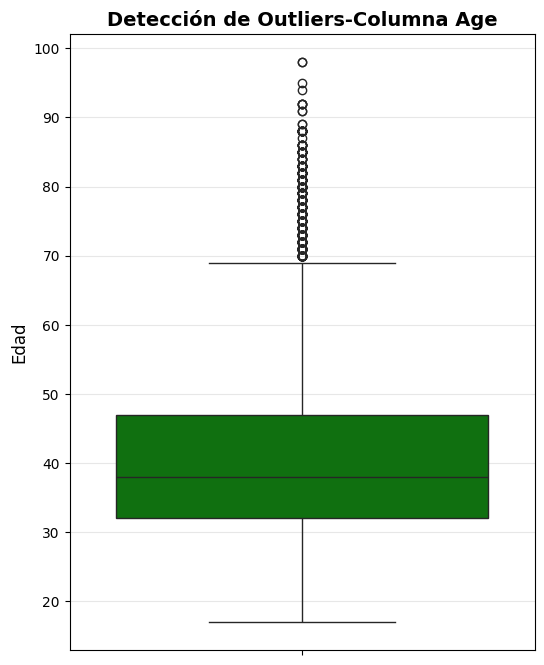

In [7]:
#Paso 1: Obtenemos un boxplot utilizando seaborn y matplotlib
plt.figure (figsize= (6, 8))
sns.boxplot(y=df_eda1['age'], color='green')
plt.title('Detección de Outliers-Columna Age', fontweight= 'bold', fontsize=14)
plt.ylabel('Edad', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

Visto que hay presencia de outliers, vamos a sustituir los valores nulos por su mediana.

In [8]:
#Paso 1: Obtenemos la mediana de la columna age
mediana_age = df_eda1['age'].median()
print (f"La mediana de la edad es {mediana_age}")


La mediana de la edad es 38.0


In [9]:
#Paso 2: Sustituimos los valores nulos por la mediana 
df_eda1['age'] = df_eda1['age'].fillna(mediana_age)
print ("valores sustituidos")
df_eda1['age']

valores sustituidos


0        38.0
1        57.0
2        37.0
3        40.0
4        56.0
         ... 
42995    38.0
42996    34.0
42997    38.0
42998    38.0
42999    38.0
Name: age, Length: 43000, dtype: float64

In [10]:
#Paso 3: Volvemos a comprobar los nulos 
df_eda1['age'].isnull().mean()

np.float64(0.0)

***Columna age***

En este caso la decisión es más fácil al tratarse de una variable categórica. Lo que haremos será crear una nueva categoría que será unknown.

In [11]:
#Paso 1: Sustituimos los nulos 
df_eda1['education'] = df_eda1['education'].fillna('Unknown')
print("Valores sustituidos")

Valores sustituidos


In [12]:
#Paso 2: Comprobamos que no quedan nulos 
df_eda1['education'].isnull().mean()

np.float64(0.0)

**Paso 2: Transformación de variables**

Recordemos que las variables categóricas son las siguientes:
- job 
- education 
- marital

En primer lugar vamos a realizar un análisis de las variables categóricas:

***Columna Job***

VARIABLE: job
 
Número de categorías: 11
 
Distribución de frecuencias
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64
 
Porcentajes
job
admin.           25.49
blue-collar      22.63
technician       16.47
services          9.76
management        7.15
retired           4.20
entrepreneur      3.57
self-employed     3.49
housemaid         2.63
unemployed        2.49
student           2.12
Name: proportion, dtype: float64






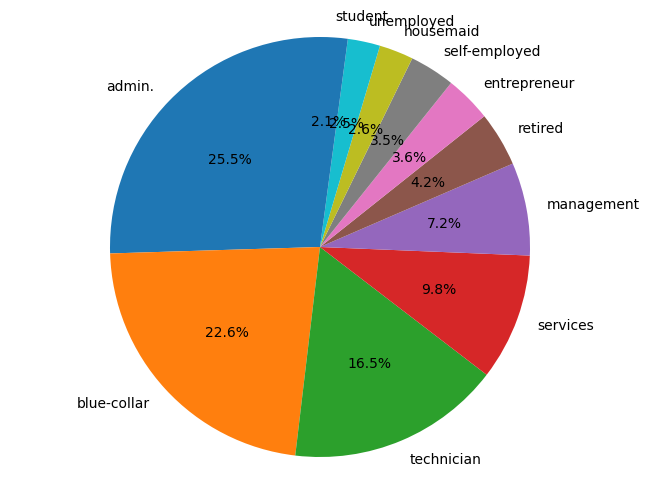

In [13]:
#Paso 1: Realizamos un análisis incial 
cat_analysis (df_eda1[['job']])

Visto que la columna tiene muchas categorías vamos a agruparla en 4 tipos de trabajos solo para obtener insights más valiosos. Las nuevas categorías serán: 
1. Administration = admin + management + technician
2. Industry = blue-collar + services
3. Independent = entrepeneur + self-employed
4. Non-active = retired + unemployed + housemaid + student

In [14]:
#Creamos una variable nueva con las nuevas categorías 
job_mapping = {
    'admin.' : 'Administration',
    'management' : 'Administration',
    'technician' : 'Administration', 
    'blue-collar' : 'Industry',
    'services' : 'Industry',
    'entrepreneur' : 'Independent',
    'self-employed' : 'Independent', 
    'retired' : 'Non-active',
    'unemployed' : 'Non-active',
    'housemaid' : 'Non-active',
    'student' : 'Non-active'
}
df_eda1['job'] = df_eda1['job'].map(job_mapping)
#Cambiamos ahora los nulos por la etiqueta 'Not-specified'
df_eda1['job'] = df_eda1['job'].fillna('Not specified')
print (df_eda1['job'].value_counts())


job
Administration    20949
Industry          13816
Non-active         4879
Independent        3011
Not specified       345
Name: count, dtype: int64


***Columna education***

VARIABLE: education
 
Número de categorías: 8
 
Distribución de frecuencias
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
Unknown                 1807
illiterate                18
Name: count, dtype: int64
 
Porcentajes
education
university.degree      29.59
high.school            23.08
basic.9y               14.67
professional.course    12.74
basic.4y               10.13
basic.6y                5.55
Unknown                 4.20
illiterate              0.04
Name: proportion, dtype: float64






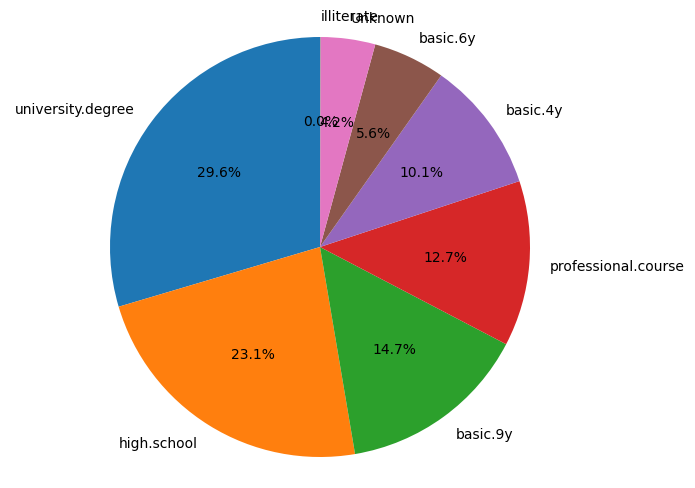

In [15]:
cat_analysis (df_eda1[['education']])

En este caso, la transformación va a consistir en convertir las columnas de educación básica en una única columna y a cambiar los nombres de las columnas en algo más legible.

In [16]:
education_mapping = {
    'university.degree' : 'University',
    'professional.course' : 'Professional Course',
    'high.school' : 'High school',
    'basic.9y' : 'Basic education',
    'basic.6y' : 'Basic education',
    'basic.4y' : 'Basic education',
    'illiterate' : 'Illiterate',
    'Unknown' : 'Unknown'
}
df_eda1['education'] = df_eda1['education'].map(education_mapping)
print (df_eda1['education'].value_counts()) 

education
Basic education        13051
University             12722
High school             9925
Professional Course     5477
Unknown                 1807
Illiterate                18
Name: count, dtype: int64


***Columna marital***

VARIABLE: marital
 
Número de categorías: 3
 
Distribución de frecuencias
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64
 
Porcentajes
marital
MARRIED     60.58
SINGLE      28.21
DIVORCED    11.21
Name: proportion, dtype: float64






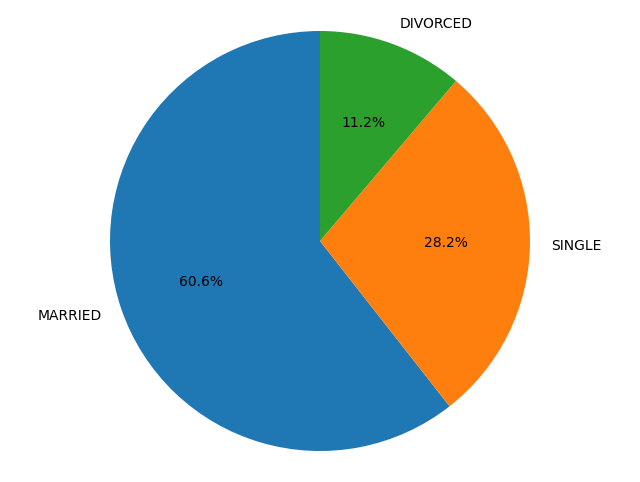

In [17]:
cat_analysis (df_eda1[['marital']])

La columna marital no requiere de una mayor transformación

In [18]:
#Revisamos de nuevo las columnas de nuestro dataframe
df_eda1.head()

,suscribed,age,job,education,marital,Income,Kidhome,Teenhome
0,no,38.0,Non-active,Basic education,MARRIED,161770,1,0
1,no,57.0,Industry,High school,MARRIED,85477,1,1
2,no,37.0,Industry,High school,MARRIED,147233,1,1
3,no,40.0,Administration,Basic education,MARRIED,121393,1,2
4,no,56.0,Industry,High school,MARRIED,63164,1,2


El último cambio que vamos a realizar es sobre la columna age conviertiendola en una columna de numeros enteros.

In [19]:
df_eda1['age'] = df_eda1['age'].round().astype(int)
print (df_eda1['age'])

0        38
1        57
2        37
3        40
4        56
         ..
42995    38
42996    34
42997    38
42998    38
42999    38
Name: age, Length: 43000, dtype: int64


Volvemos a visualizar las columnas y los primeros valores y obtenemos los nulos para verificar que podemos realizar el EDA.

In [20]:
df_eda1.head()

,suscribed,age,job,education,marital,Income,Kidhome,Teenhome
0,no,38,Non-active,Basic education,MARRIED,161770,1,0
1,no,57,Industry,High school,MARRIED,85477,1,1
2,no,37,Industry,High school,MARRIED,147233,1,1
3,no,40,Administration,Basic education,MARRIED,121393,1,2
4,no,56,Industry,High school,MARRIED,63164,1,2


Exportamos el dataframe para realizar el análisis.

In [22]:
df_eda1.to_csv("data_transformado", index = False)
print("dataframe exportado")

dataframe exportado
